## Analysis of dictionary classification using LIWC dictionary

The following notebook includes some exploratory analysis of the outcome of the application of LIWC dictionaries, as well as some visualisation to use in the thesis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from scipy.stats import ttest_rel
import plotly.express as px
from scipy.interpolate import make_interp_spline
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import math
from scipy.stats import levene
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
from scipy.stats import mannwhitneyu
from scipy.stats import sem



### Reading in LIWC dictionary results and only keeping the dictionaries we are interested in

In [3]:
# read in LIWC data
liwc_analysis = pd.read_csv('../Documents/Social Data Science - Masters/Thesis/Data/personal - LIWC-22 Results - guardian_classified_clean - LIWC Analysis.csv')

In [4]:
# import other dictionary which allows me to remove the words relating to 'friendlies'
liwc_analysis_friend = pd.read_csv('../Documents/Social Data Science - Masters/Thesis/Data/Friend-dict - LIWC-22 Results - guardian_classified_clean - LIWC Analysis (1).csv')

In [5]:
# import other dictionary which allows me to remove the words relating to 'friendlies'
liwc_analysis_leisure = pd.read_csv('../Documents/Social Data Science - Masters/Thesis/Data/Leisure - LIWC-22 Results - guardian_classified_clean - LIWC Analysis.csv')

In [6]:
liwc_analysis['Friendlies'] = liwc_analysis_friend['friendly_dict'].values
liwc_analysis['Leisure_remove'] = liwc_analysis_leisure['Leisure_remove'].values

In [7]:
liwc_analysis['friend'] = liwc_analysis['friend'] - liwc_analysis['Friendlies']
liwc_analysis['leisure'] = liwc_analysis['leisure'] - liwc_analysis['Leisure_remove']

In [8]:
# Assuming 'column_name' is the name of the column in the dataframe
mean_value = liwc_analysis['friend'].mean()
lowest_value = liwc_analysis['friend'].min()
highest_value = liwc_analysis['friend'].max()

# Print the results
print(f"Mean: {mean_value}, Lowest: {lowest_value}, Highest: {highest_value}")

Mean: 0.0108127348230176, Lowest: -0.010000000000000009, Highest: 2.8


In [9]:
# Assuming 'column_name' is the name of the column in the dataframe
mean_value = liwc_analysis['leisure'].mean()
lowest_value = liwc_analysis['leisure'].min()
highest_value = liwc_analysis['leisure'].max()

# Print the results
print(f"Mean: {mean_value}, Lowest: {lowest_value}, Highest: {highest_value}")

Mean: 0.21494310316932425, Lowest: 0.0, Highest: 5.95


In [10]:
# Count the number of values in the 'friend' column that are under 0
count_under_zero = (liwc_analysis['friend'] < 0).sum()

# Print the count
print(f"Number of values under 0: {count_under_zero}")


Number of values under 0: 7


In [11]:
# create separate dataframes for mens and womens articles
liwc_analysis_men = liwc_analysis[liwc_analysis['only_men'] == True]

liwc_analysis_women = liwc_analysis[liwc_analysis['only_women'] == True]



In [12]:
# select only the columns I am interested in
subset_columns = ['family', 'friend', 'sexual', 'leisure']  

# Calculate the mean of the specified columns
liwc_average_values_men = liwc_analysis_men[subset_columns].mean()

In [13]:
liwc_average_values_women = liwc_analysis_women[subset_columns].mean()

In [14]:
monthly_average_men_liwc = liwc_analysis_men.groupby('month_year')[subset_columns].mean()

In [15]:
monthly_average_women_liwc = liwc_analysis_women.groupby('month_year')[subset_columns].mean()

### Some descriptive findings based on personal categories to find example articles 

In [16]:
# find top 10 articles based on occurences of family category for women
top_10_family = liwc_analysis_women.nlargest(10, 'family')
top_10_family.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,Leisure_remove
31027,article,Football,Phil Neville’s son Harvey called into Republic...,https://www.theguardian.com/football/2019/oct/...,2019-10-08,Phil Neville’s son Harvey called into Republic...,"Harvey Neville, son of the England Women manag...",273,Paul Doyle,1586,...,1,True,False,1,3.87,0.0,0.00,0.00,1.41,0.70
31357,article,Football,West Ham’s Kenza Dali: ‘Football was my escape...,https://www.theguardian.com/football/2019/oct/...,2019-10-31,West Ham’s Kenza Dali: ‘Football was my escape...,“I would tell myself to look at my mother’s br...,1166,Suzanne Wrack,6255,...,1,True,False,1,3.48,0.0,0.00,0.00,0.17,1.44
32950,article,Football,Alex Morgan shows pregnancy does not end a pla...,https://www.theguardian.com/football/2020/feb/...,2020-02-10,Alex Morgan shows pregnancy does not end a pla...,It already has 1.5 million views. Alex Morgan ...,877,Suzanne Wrack,5306,...,1,True,False,1,3.15,0.0,0.22,2.02,0.34,2.14
23666,article,Football,'Gotta teach 'em': Sydney Leroux Dwyer fells s...,https://www.theguardian.com/football/2018/jun/...,2018-06-04,'Gotta teach 'em': Sydney Leroux Dwyer fells s...,Sydney Leroux Dwyer knows football can be a to...,199,Guardian sport,1101,...,1,True,False,1,2.86,0.0,0.00,0.00,0.00,3.81
32844,article,Football,Mum’s the word: how the W-League supports its ...,https://www.theguardian.com/football/2020/feb/...,2020-02-03,Mum’s the word: how the W-League supports its ...,“Could you hold on a second?” A delighted sque...,1255,Samantha Lewis,7232,...,1,True,False,1,2.84,0.0,0.71,0.08,0.08,1.82


In [17]:
top_10_family['family']

31027    3.87
31357    3.48
32950    3.15
23666    2.86
32844    2.84
46460    2.78
31064    2.63
36854    2.48
3992     2.39
50677    2.24
Name: family, dtype: float64

In [19]:
# find top 10 articles based on occurences of family category for women
top_10_family = liwc_analysis_men.nlargest(20, 'family')
top_10_family


,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,Leisure_remove
43592,article,Football,Cristiano Ronaldo on compassionate leave after...,https://www.theguardian.com/football/2022/apr/...,2022-04-19,Cristiano Ronaldo on compassionate leave after...,Cristiano Ronaldo is on compassionate leave fo...,215,Jamie Jackson,1334,...,2,False,True,1,6.19,0.00,0.00,0.00,0.00,1.77
7810,article,Football,The baby named Arsenal backwards – and other k...,https://www.theguardian.com/football/shortcuts...,2016-01-06,The baby named Arsenal backwards – and other k...,Never marry a football fan. That is the messag...,394,Homa Khaleeli,2339,...,2,False,True,1,5.13,0.00,0.24,0.00,0.00,1.47
3757,article,Football,Mother of Leicester winger Marc Albrighton’s p...,https://www.theguardian.com/football/2015/jun/...,2015-06-28,Mother of Leicester winger Marc Albrighton’s p...,Leicester City have offered their condolences ...,329,Mark Dobson,1874,...,2,False,True,1,5.00,0.00,0.30,0.00,0.00,0.88
6755,article,Football,Father names baby son Bermondsey Millwall Den ...,https://www.theguardian.com/football/2015/nov/...,2015-11-19,Father names baby son Bermondsey Millwall Den ...,A Millwall fan has explained his decision to n...,217,Guardian sport,1145,...,2,False,True,1,4.87,0.00,0.00,0.00,0.44,0.00
2804,article,Football,Emmanuel Adebayor launches blistering broadsid...,https://www.theguardian.com/football/2015/may/...,2015-05-06,Emmanuel Adebayor launches blistering broadsid...,Emmanuel Adebayor has launched an astonishing ...,681,Guardian sport,3618,...,2,False,True,1,4.49,0.00,0.15,0.00,0.00,0.72
1187,article,Football,Everton to unveil Hillsborough memorial at Mer...,https://www.theguardian.com/football/2015/feb/...,2015-02-05,Everton to unveil Hillsborough memorial at Mer...,Everton will unveil a plaque at Saturday’s Mer...,168,Guardian sport,1004,...,2,False,True,1,3.98,0.00,0.00,0.00,0.00,0.57
54819,article,Football,"Like father, like son: the children of greats ...",https://www.theguardian.com/football/article/2...,2024-06-29,"Like father, like son: the children of greats ...","Schmeichel, Thuram, Blind, Chiesa, Hagi and Co...",1067,Sid Lowe,5841,...,2,False,True,1,3.98,0.19,0.19,0.00,0.00,1.94
33592,article,Football,Pep Guardiola's mother dies aged 82 after cont...,https://www.theguardian.com/football/2020/apr/...,2020-04-06,Pep Guardiola's mother dies aged 82 after cont...,"Pep Guardiola’s mother, Dolors Sala Carrió, ha...",395,Jamie Jackson,2428,...,2,False,True,1,3.71,0.00,0.00,0.00,0.50,1.49
484,article,Football,Norwegian Liverpool fans who named daughter YN...,https://www.theguardian.com/football/2015/jan/...,2015-01-21,Norwegian Liverpool fans who named daughter YN...,A four-year-old Norwegian girl named YNWA by h...,244,Guardian sport,1426,...,2,False,True,1,3.53,0.00,0.00,0.39,0.00,0.39
6681,article,Football,France midfielder Lassana Diarra reveals cousi...,https://www.theguardian.com/football/2015/nov/...,2015-11-14,France midfielder Lassana Diarra reveals cousi...,The France midfielder Lassana Diarra has revea...,333,Observer Sport,2004,...,2,False,True,1,3.50,0.00,0.59,0.00,0.00,0.87


In [327]:
top_10_family['family']

43592    6.19
7810     5.13
3757     5.00
6755     4.87
2804     4.49
1187     3.98
54819    3.98
33592    3.71
484      3.53
6681     3.50
Name: family, dtype: float64

In [328]:
# find top 10 articles based on occurences of friend category
top_10_friend = liwc_analysis_women.nlargest(10, 'friend')
top_10_friend.head(10)

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,leisure_remove
43319,article,Football,Sign up for the Moving the Goalposts newslette...,https://www.theguardian.com/football/2022/mar/...,2022-03-22,Sign up for the Moving the Goalposts newslette...,Join us as we delve deeper into the wonderful ...,128,Suzanne Wrack,794,...,1,True,False,1,0.00,0.71,5.00,0.0,0.00,2.86
38467,article,Football,NWSL opens probe after Sarah Gorden accuses se...,https://www.theguardian.com/football/2021/apr/...,2021-04-14,NWSL opens probe after Sarah Gorden accuses se...,The National Women’s Soccer League opened an i...,323,Guardian sport and agencies,1920,...,1,True,False,1,0.30,0.60,0.00,0.0,0.00,1.19
49618,article,Football,Alessia Russo admits Arsenal move took ‘weight...,https://www.theguardian.com/football/2023/jul/...,2023-07-17,Alessia Russo admits Arsenal move took ‘weight...,Alessia Russo says she has a “weight off my sh...,437,Suzanne Wrack on the Sunshine Coast,2298,...,1,True,False,1,0.23,0.45,0.46,0.0,0.45,2.71
3962,article,Football,England women will rally round Laura Bassett a...,https://www.theguardian.com/football/2015/jul/...,2015-07-02,England women will rally round Laura Bassett a...,Karen Carney was utterly dismayed yet intensel...,751,Louise Taylor in Edmonton,4303,...,1,True,False,1,0.39,0.39,0.26,0.0,0.13,1.44
49995,article,Football,‘This is huge’: triumphant Matildas thrill gro...,https://www.theguardian.com/football/2023/aug/...,2023-08-07,‘This is huge’: triumphant Matildas thrill gro...,"They came in the thousands, armed with picnic ...",764,Caitlin Cassidy and Jordyn Beazley,4268,...,1,True,False,1,0.39,0.38,0.77,0.0,0.39,1.68
15267,article,Football,Goal frenzy as Canberra hit seven and Adelaide...,https://www.theguardian.com/football/2017/jan/...,2017-01-14,Goal frenzy as Canberra hit seven and Adelaide...,Ashleigh Sykes struck four times as Canberra U...,264,Guardian sport,1514,...,1,True,False,1,0.00,0.36,0.00,0.0,0.00,0.36
43574,liveblog,Football,Lyon 3-2 PSG: Women’s Champions League semi-fi...,https://www.theguardian.com/football/live/2022...,2022-04-24,Lyon 3-2 PSG: Women’s Champions League semi-fi...,And that’s that … for now. It’s advantage Lyon...,1651,Alex Hess,9392,...,1,True,False,1,0.00,0.36,0.06,0.0,0.00,0.96
40253,article,Football,The secret to Carli Lloyd’s brilliant career? ...,https://www.theguardian.com/football/2021/aug/...,2021-08-17,The secret to Carli Lloyd’s brilliant career? ...,"At 39 Carli Lloyd was, by some distance, the o...",849,Beau Dure,4879,...,1,True,False,1,0.59,0.35,0.00,0.0,0.24,4.47
13019,article,Football,Liverpool fans should celebrate Matt Busby and...,https://www.theguardian.com/football/2016/sep/...,2016-09-07,Liverpool fans should celebrate Matt Busby and...,I have often wondered why we Liverpool support...,297,Letters,1848,...,1,True,False,1,0.00,0.32,2.21,0.0,0.00,0.95
50132,article,Football,The Matildas’ win had an entire country holdin...,https://www.theguardian.com/football/2023/aug/...,2023-08-13,The Matildas’ win had an entire country holdin...,"For one night, Australia held its collective b...",664,Caitlin Cassidy,3999,...,1,True,False,1,0.00,0.29,1.76,0.0,0.15,1.62


In [329]:
top_10_friend['friend']

43319    0.71
38467    0.60
49618    0.45
3962     0.39
49995    0.38
15267    0.36
43574    0.36
40253    0.35
13019    0.32
50132    0.29
Name: friend, dtype: float64

In [20]:
# find top 10 articles based on occurences of friend category
top_10_friend = liwc_analysis_men.nlargest(15, 'friend')
top_10_friend.head(15)

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,Leisure_remove
41794,article,Football,Dispatches from the communist party’s people-l...,https://www.theguardian.com/football/blog/2021...,2021-12-07,Dispatches from the communist party’s people-l...,“Football is a private sector business and has...,880,Jonathan Liew,5375,...,2,False,True,1,0.22,2.80,0.56,0.00,0.00,0.67
13143,article,Football,Melbourne Victory close on Michael Essien gues...,https://www.theguardian.com/football/2016/sep/...,2016-09-14,Melbourne Victory close on Michael Essien gues...,Melbourne Victory are interested in taking adv...,357,Mike Hytner,2131,...,2,False,True,1,0.00,1.91,0.00,0.00,0.55,3.55
6698,article,Football,Euro 2016’s ‘Beau Jeu’ matchball unveiled by a...,https://www.theguardian.com/football/2015/nov/...,2015-11-12,Euro 2016’s ‘Beau Jeu’ matchball unveiled by a...,Adidas has unveiled the official match ball fo...,150,Guardian sport,902,...,2,False,True,1,0.00,1.90,0.00,0.00,0.00,2.53
2992,article,Football,Egypt legend Mohamed Aboutrika denies supporti...,https://www.theguardian.com/football/2015/may/...,2015-05-14,Egypt legend Mohamed Aboutrika denies supporti...,The three-times African player of the year Moh...,236,Ed Aarons,1469,...,2,False,True,1,0.00,1.64,0.00,0.00,0.00,0.82
11311,article,Football,Chris Gunter works on winning script for Wales...,https://www.theguardian.com/football/2016/jun/...,2016-06-26,Chris Gunter works on winning script for Wales...,One of the problems with exceeding all expecta...,714,Stuart James at the Parc des Princes,3751,...,2,False,True,1,3.16,1.37,0.41,0.00,0.14,0.83
13830,article,Football,Huddersfield manager David Wagner has Joe Gome...,https://www.theguardian.com/football/2016/oct/...,2016-10-20,Huddersfield manager David Wagner has Joe Gome...,Huddersfield Town’s manager David Wagner may u...,154,Andy Hunter,962,...,2,False,True,1,0.61,1.21,0.00,0.61,0.00,1.21
896,article,Football,QPR’s Chris Ramsey prepared to bring Adel Taar...,https://www.theguardian.com/football/2015/feb/...,2015-02-06,QPR’s Chris Ramsey prepared to bring Adel Taar...,With the club engulfed in more uncertainty fol...,550,Paul Doyle,3074,...,2,False,True,1,0.00,1.07,0.18,0.00,0.00,0.71
15290,article,Football,Leicester complete £15m deal for Genk midfield...,https://www.theguardian.com/football/2017/jan/...,2017-01-03,Leicester complete £15m deal for Genk midfield...,Leicester City have signed Wilfred Ndidi from ...,104,Guardian sport,614,...,2,False,True,1,0.00,0.88,0.00,0.00,0.00,0.88
33698,article,Football,Celta Vigo's Smolov defies lockdown to return ...,https://www.theguardian.com/sport/2020/apr/05/...,2020-04-05,Celta Vigo's Smolov defies lockdown to return ...,Fedor Smolov has become the second Celta Vigo ...,227,Guardian sport,1326,...,2,False,True,1,1.26,0.84,0.00,0.00,0.00,0.84
46791,article,Football,Fifa investigating how chef Salt Bae got on to...,https://www.theguardian.com/football/2022/dec/...,2022-12-22,Fifa investigating how chef Salt Bae got on to...,Fifa has launched an investigation into how so...,351,Harry Taylor,2146,...,2,False,True,1,0.00,0.83,1.94,0.00,0.00,3.05


In [331]:
top_10_friend['friend']

41794    2.80
13143    1.91
6698     1.90
2992     1.64
11311    1.37
13830    1.21
896      1.07
15290    0.88
33698    0.84
46791    0.83
11393    0.82
24500    0.78
10828    0.77
51092    0.73
29584    0.70
Name: friend, dtype: float64

In [332]:
# find top 10 articles based on occurences of sexual category
top_10_sexual = liwc_analysis_women.nlargest(10, 'sexual')
top_10_sexual.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,leisure_remove
29807,article,Football,'Go gays!': Why USA's LGBTQ World Cup stars ar...,https://www.theguardian.com/football/2019/jul/...,2019-07-05,'Go gays!': Why USA's LGBTQ World Cup stars ar...,“Go gays!” said Megan Rapinoe following USA’s ...,893,Parker Molloy,5360,...,1,True,False,1,0.22,0.00,0.55,3.31,0.00,3.42
50152,article,Football,"As a queer sports fan, the World Cup was an in...",https://www.theguardian.com/football/commentis...,2023-08-24,"As a queer sports fan, the World Cup was an in...","As a queer sports fan, the past few weeks have...",865,Rebecca Shaw,4715,...,1,True,False,1,0.00,0.00,2.04,2.94,0.00,1.70
13787,article,Football,Police try to reassure sexual assault victims ...,https://www.theguardian.com/football/2016/oct/...,2016-10-17,Police try to reassure sexual assault victims ...,The lead police officer on sex crimes for Engl...,620,Steven Morris,3685,...,1,True,False,1,0.00,0.00,0.00,2.69,0.00,0.32
13730,article,Football,Ched Evans: footballer found not guilty of rap...,https://www.theguardian.com/football/2016/oct/...,2016-10-14,Ched Evans: footballer found not guilty of rap...,International footballer Ched Evans has been f...,1226,Steven Morris and Alexandra Topping,7186,...,1,True,False,1,0.32,0.25,0.24,2.27,0.32,0.81
40014,article,Football,Former head of referees at Haitian FA banned f...,https://www.theguardian.com/football/2021/jul/...,2021-07-23,Former head of referees at Haitian FA banned f...,Fifa’s ethics committee has issued a lifetime ...,475,"Ed Aarons, Romain Molina and Alex Cizmic",3000,...,1,True,False,1,0.00,0.00,0.82,2.04,0.00,0.82


In [333]:
top_10_sexual['sexual']

29807    3.31
50152    2.94
13787    2.69
13730    2.27
40014    2.04
32950    2.02
55563    1.93
2658     1.68
13754    1.65
44781    1.57
Name: sexual, dtype: float64

In [334]:
# find top 10 articles based on occurences of sexual category
top_10_sexual = liwc_analysis_men.nlargest(10, 'sexual')
top_10_sexual.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,leisure_remove
11634,article,Football,Euro 2016: Uefa red-faced as mascot shares nam...,https://www.theguardian.com/football/2016/jun/...,2016-06-10,Euro 2016: Uefa red-faced as mascot shares nam...,In a build-up marked by tension over weightier...,184,Owen Gibson in Paris,1043,...,2,False,True,1,0.0,0.0,1.03,4.10,0.51,0.00
44711,article,Football,Premier League footballer arrested by Met poli...,https://www.theguardian.com/football/2022/jul/...,2022-07-04,Premier League footballer arrested by Met poli...,A leading Premier League footballer has been a...,114,Nick Ames,661,...,2,False,True,1,0.0,0.0,0.00,4.00,0.00,1.60
11644,liveblog,Football,Euro 2016: here … we … go,https://www.theguardian.com/football/live/2016...,2016-06-10,Euro 2016: here … we … go,Tournament organisers face embarrassment of a ...,111,Guardian sport,647,...,2,False,True,1,0.0,0.0,0.00,3.48,0.00,0.00
44558,article,Football,Premier League club of arrested player knew of...,https://www.theguardian.com/football/2022/jul/...,2022-07-08,Premier League club of arrested player knew of...,The Premier League club of the footballer arre...,361,Exclusive by Suzanne Wrack and Nick Ames,2117,...,2,False,True,1,0.0,0.0,0.00,3.22,0.00,1.34
42159,article,Football,Tottenham criticise fans’ homophobic chants du...,https://www.theguardian.com/football/2022/jan/...,2022-01-06,Tottenham criticise fans’ homophobic chants du...,Tottenham have criticised homophobic chants by...,182,Guardian sport,1114,...,2,False,True,1,0.0,0.0,0.52,3.13,0.00,2.08


In [335]:
top_10_sexual['sexual']

11634    4.10
44711    4.00
11644    3.48
44558    3.22
42159    3.13
44774    3.11
45491    2.99
881      2.86
27445    2.80
44762    2.73
Name: sexual, dtype: float64

In [336]:
# find top 10 articles based on occurences of sexual category
top_10_leisure = liwc_analysis_women.nlargest(10, 'leisure')
top_10_leisure.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,leisure_remove
38618,article,Football,Women’s sport could generate more than £1bn pe...,https://www.theguardian.com/football/2021/apr/...,2021-04-20,Women’s sport could generate more than £1bn pe...,Women’s sport could generate more than £1bn pe...,390,Suzanne Wrack,2370,...,1,True,False,1,0.00,0.00,5.95,0.0,0.0,1.74
7686,article,Football,Women’s sport on an unlevel playing field | Le...,https://www.theguardian.com/football/2015/dec/...,2015-12-30,Women’s sport on an unlevel playing field,I have four adult daughters who participate in...,164,Letters,1022,...,1,True,False,1,1.14,0.00,5.11,0.0,0.0,2.84
29419,article,Football,Women's World Cup match attracts bigger TV aud...,https://www.theguardian.com/football/2019/jun/...,2019-06-10,Women's World Cup match attracts bigger TV aud...,Women’s football is now more popular than cric...,383,Jim Waterson Media editor,2418,...,1,True,False,1,0.00,0.00,5.07,0.0,0.0,3.81
43319,article,Football,Sign up for the Moving the Goalposts newslette...,https://www.theguardian.com/football/2022/mar/...,2022-03-22,Sign up for the Moving the Goalposts newslette...,Join us as we delve deeper into the wonderful ...,128,Suzanne Wrack,794,...,1,True,False,1,0.00,0.71,5.00,0.0,0.0,2.86
45782,article,Football,Ireland apologise for singing pro-IRA song aft...,https://www.theguardian.com/football/2022/oct/...,2022-10-12,Ireland apologise for singing pro-IRA song aft...,The Football Association of Ireland has apolog...,398,Sean Ingle,2326,...,1,True,False,1,0.74,0.00,3.92,0.0,0.0,2.94


In [337]:
top_10_leisure['leisure']

38618    5.95
7686     5.11
29419    5.07
43319    5.00
45782    3.92
34933    3.78
13428    3.72
26692    3.33
29773    3.07
52981    2.96
Name: leisure, dtype: float64

In [338]:
# find top 10 articles based on occurences of sexual category
top_10_leisure = liwc_analysis_men.nlargest(10, 'leisure')
top_10_leisure.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,classification,only_women,only_men,Segment,family,friend,leisure,sexual,Friendlies,leisure_remove
6355,article,Football,Long-lost George Best art film is resurrected ...,https://www.theguardian.com/football/2015/oct/...,2015-10-30,Long-lost George Best art film is resurrected ...,An avant garde film in which the camera linger...,801,Henry McDonald Ireland correspondent,4574,...,2,False,True,1,0.25,0.0,5.68,0.0,0.0,1.23
46811,article,Football,Dancing footballers and fans bring joy to the ...,https://www.theguardian.com/football/2022/dec/...,2022-12-09,Dancing footballers and fans bring joy to the ...,Zoe Williams states in her column (Watching pe...,231,Unknown,1420,...,2,False,True,1,0.00,0.0,5.00,0.0,0.0,4.58
15261,article,Football,Referral for prosecution in Egypt over $1bn Af...,https://www.theguardian.com/football/2017/jan/...,2017-01-05,Referral for prosecution in Egypt over $1bn Af...,The Confederation of African Football has been...,730,David Conn,4557,...,2,False,True,1,0.00,0.0,4.70,0.0,0.0,0.81
12309,article,Football,Premier League TV fixture changes: Manchester ...,https://www.theguardian.com/football/2016/jul/...,2016-07-07,Premier League TV fixture changes: Manchester ...,The Premier League has revealed which matches ...,552,Guardian sport,3853,...,2,False,True,1,0.00,0.0,4.64,0.0,0.0,0.96
23927,article,Football,Argentina draw becomes most-watched Iceland sp...,https://www.theguardian.com/football/2018/jun/...,2018-06-18,Argentina draw becomes most-watched Iceland sp...,"Iceland’s National Broadcasting Service, RÚV, ...",154,Martin Belam and agencies,950,...,2,False,True,1,0.00,0.0,4.25,0.0,0.0,2.42


In [339]:
top_10_leisure['leisure']

6355     5.68
46811    5.00
15261    4.70
12309    4.64
23927    4.25
27425    4.22
5291     4.17
28297    4.07
47362    4.03
36913    4.02
Name: leisure, dtype: float64

### Reading in version with human-coded dictionary 

In [16]:
# read in LIWC data
human_coded_analysis = pd.read_csv('../Documents/Social Data Science - Masters/Thesis/Data/LIWC-22 Results - guardian_classified_clean - human dict.csv')


In [17]:
human_coded_analysis.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
0,article,Football,Why always him? What made Rodgers turn to Mari...,https://www.theguardian.com/football/blog/2015...,2015-01-28,Why always him? What made Rodgers turn to Mari...,With all eyes on Diego Costa and where he stam...,720,Andy Hunter,4220,...,0,2015-01-01,2,False,True,1,3.01,1.37,0.14,1.50
1,article,Football,Football transfer rumours: Mario Suárez to Ars...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Football transfer rumours: Mario Suárez to Ars...,"Fizzle, crackle, crackle, fizzle, crackle, cra...",434,Gregg Bakowski,2408,...,0,2015-01-01,2,False,True,1,3.62,0.23,0.00,3.39
2,article,Football,Kenny Lowe: the man leading Perth Glory to the...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Kenny Lowe: the man leading Perth Glory to the...,Kenny Lowe jokes that when he leaves Perth Glo...,937,Jack Kerr,5300,...,0,2015-01-01,2,False,True,1,3.17,2.54,0.00,0.63
3,article,Football,Manchester United consider Aston Villa’s Ron V...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Manchester United consider Aston Villa’s Ron V...,Ron Vlaar is under consideration by Louis van ...,299,Jamie Jackson,1703,...,0,2015-01-01,2,False,True,1,6.15,2.27,0.32,3.56
4,article,Football,Tony Pulis appointed West Brom head coach on t...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Tony Pulis appointed West Brom head coach on t...,Tony Pulis has been appointed as the new head ...,306,Guardian sport,1777,...,0,2015-01-01,2,False,True,1,7.30,5.40,0.00,1.90


In [18]:
# Filter the DataFrame where only_men is True
human_coded_analysis_men = human_coded_analysis[human_coded_analysis['only_men'] == True]

In [19]:
# Filter the DataFrame where only_women is True
human_coded_analysis_women = human_coded_analysis[human_coded_analysis['only_women'] == True]

### Some descriptive findings based on professional categories to find example articles 

In [344]:
# find top 10 articles based on occurences of Game-related category
top_10_game = human_coded_analysis_women.nlargest(10, 'Game-related')
top_10_game.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
3476,article,Football,Women's World Cup: fans' photos from USA's vic...,https://www.theguardian.com/football/2015/jun/...,2015-06-09,Women's World Cup: fans' photos from USA's vic...,Team USA kicked off their World Cup campaign w...,27,Tom Stevens,155,...,0,2015-06-01,1,True,False,1,16.22,16.22,0.0,0.00
4025,article,Football,USA's World Cup victory over Japan smashes TV ...,https://www.theguardian.com/football/2015/jul/...,2015-07-06,USA's World Cup victory over Japan smashes TV ...,The US women’s national team thrashed Japan 5-...,318,Tim Hill,1823,...,0,2015-07-01,1,True,False,1,8.79,8.79,0.0,0.00
2239,article,Football,FA Women’s Cup: Chelsea drawn against Manchest...,https://www.theguardian.com/football/2015/apr/...,2015-04-13,FA Women’s Cup: Chelsea drawn against Manchest...,Chelsea will face Manchester City in the semi-...,117,Stuart Goodwin,688,...,0,2015-04-01,1,True,False,1,19.53,8.59,0.0,10.94
45672,article,Football,Lionesses v USA the fastest-selling England ga...,https://www.theguardian.com/football/2022/oct/...,2022-10-07,Lionesses v USA the fastest-selling England ga...,The Lionesses’ showdown with the world champio...,213,Suzanne Wrack,1215,...,0,2022-10-01,1,True,False,1,8.52,8.52,0.0,0.00
34975,article,Football,Revived Women's Community Shield to take place...,https://www.theguardian.com/football/2020/aug/...,2020-08-10,Revived Women's Community Shield to take place...,Chelsea will take on Manchester City in the fi...,289,Suzanne Wrack,1675,...,0,2020-08-01,1,True,False,1,13.38,8.36,0.0,5.02


In [345]:
top_10_game['Game-related']

3476     16.22
4025      8.79
2239      8.59
45672     8.52
34975     8.36
34797     8.24
25017     8.20
14263     7.91
9290      7.78
1612      7.64
Name: Game-related, dtype: float64

In [346]:
# find top 10 articles based on occurences of Game-related category
top_10_game = human_coded_analysis_men.nlargest(10, 'Game-related')
top_10_game.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
1320,article,Football,Qatar World Cup: how the 2022-23 football seas...,https://www.theguardian.com/football/2015/feb/...,2015-02-24,Qatar World Cup: how the 2022-23 football seas...,May 2022 European seasons (2021-22) end as usu...,195,Guardian Sport,1240,...,0,2015-02-01,2,False,True,1,13.33,13.33,0.0,0.00
9459,article,Football,Premier League to retain fourth Champions Leag...,https://www.theguardian.com/football/2016/mar/...,2016-03-17,Premier League to retain fourth Champions Leag...,The Premier League will retain four Champions ...,161,Guardian sport,1033,...,0,2016-03-01,2,False,True,1,16.86,12.21,0.0,4.65
17784,article,Football,Premier League 2016-17 review: vote for the be...,https://www.theguardian.com/football/2017/may/...,2017-05-23,Premier League 2016-17 review: vote for the be...,Best player Best manager Best goal Best signin...,22,Guardian sport,136,...,0,2017-05-01,2,False,True,1,11.43,11.43,0.0,0.00
1430,article,Football,Premier League B teams backed to contest Johns...,https://www.theguardian.com/football/2015/mar/...,2015-03-02,Premier League B teams backed to contest Johns...,The Football League’s proposal to allow Premie...,288,Owen Gibson,1745,...,0,2015-03-01,2,False,True,1,11.11,11.11,0.0,0.00
17013,article,Football,Sheffield United secure promotion from League ...,https://www.theguardian.com/football/2017/apr/...,2017-04-08,Sheffield United secure promotion from League ...,Sheffield United have been promoted from Leagu...,130,Observer Sport,761,...,0,2017-04-01,2,False,True,1,14.29,10.71,0.0,3.57


In [347]:
top_10_game['Game-related']

1320     13.33
9459     12.21
17784    11.43
1430     11.11
17013    10.71
1817     10.08
10738     9.90
23965     9.86
13942     9.79
28482     9.79
Name: Game-related, dtype: float64

In [348]:
# find top 10 articles based on occurences of Injury-related category
top_10_injury = human_coded_analysis_women.nlargest(10, 'Injury-related')
top_10_injury.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
30969,article,Football,Norwich v Aston Villa: match preview,https://www.theguardian.com/football/2019/oct/...,2019-10-04,Norwich v Aston Villa: match preview,Norwich’s injury malaise shows no signs of aba...,218,Unknown,1371,...,0,2019-10-01,1,True,False,1,13.33,2.67,6.67,4.00
53828,article,Football,Project ACL: WSL clubs to take part in pioneer...,https://www.theguardian.com/football/2024/apr/...,2024-04-30,Project ACL: WSL clubs to take part in pioneer...,Women’s Super League clubs are to be the subje...,269,Louise Taylor,1763,...,0,2024-04-01,1,True,False,1,8.19,1.78,6.05,0.36
26260,article,Football,Jordan Nobbs’ ligament rupture deals major blo...,https://www.theguardian.com/football/2018/nov/...,2018-11-19,Jordan Nobbs’ ligament rupture deals major blo...,Jordan Nobbs could miss next summer’s World Cu...,266,Louise Taylor,1588,...,0,2018-11-01,1,True,False,1,10.11,2.53,5.42,2.17
52129,article,Football,Sam Kerr: Chelsea and Australia striker out fo...,https://www.theguardian.com/football/2024/jan/...,2024-01-07,Sam Kerr: Chelsea and Australia striker out fo...,The Australia and Chelsea forward Sam Kerr has...,434,Suzanne Wrack,2508,...,0,2024-01-01,1,True,False,1,11.98,4.38,5.30,2.30
49637,article,Football,Matildas captain Sam Kerr out of World Cup ope...,https://www.theguardian.com/football/2023/jul/...,2023-07-20,Matildas captain Sam Kerr out of World Cup ope...,The Matildas have been rocked only an hour out...,281,Kieran Pender at Stadium Australia,1671,...,0,2023-07-01,1,True,False,1,9.18,3.74,5.10,0.34


In [349]:
top_10_injury['Injury-related']

30969    6.67
53828    6.05
26260    5.42
52129    5.30
49637    5.10
30854    4.69
51985    4.69
51806    4.49
49071    4.45
32657    3.41
Name: Injury-related, dtype: float64

In [350]:
# find top 10 articles based on occurences of Injury-related category
top_10_injury = human_coded_analysis_men.nlargest(10, 'Injury-related')
top_10_injury.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
51036,article,Football,Premier League team news: predicted lineups fo...,https://www.theguardian.com/football/2023/oct/...,2023-10-20,Premier League team news: predicted lineups fo...,LIVERPOOL v EVERTON Saturday 12.30pm TNT Sport...,1056,Guardian sport,7781,...,0,2023-10-01,2,False,True,1,14.58,2.15,8.69,3.74
52266,article,Football,Premier League team news: predicted lineups fo...,https://www.theguardian.com/football/2024/jan/...,2024-01-12,Premier League team news: predicted lineups fo...,BURNLEY v LUTON Friday 7.45pm TNT Sports 1 Ven...,572,Guardian sport,4198,...,0,2024-01-01,2,False,True,1,14.31,2.21,8.69,3.41
53319,article,Football,Premier League team news: predicted lineups fo...,https://www.theguardian.com/football/2024/mar/...,2024-03-29,Premier League team news: predicted lineups fo...,NEWCASTLE v WEST HAM Saturday 12.30pm TNT Spor...,1117,Guardian sport,8230,...,0,2024-03-01,2,False,True,1,14.50,2.56,8.49,3.45
53764,article,Football,Premier League team news: predicted lineups fo...,https://www.theguardian.com/football/2024/apr/...,2024-04-26,Premier League team news: predicted lineups fo...,WEST HAM v LIVERPOOL Saturday 12.30pm TNT Spor...,1135,Guardian sport,8277,...,0,2024-04-01,2,False,True,1,13.48,1.57,8.43,3.48
16927,article,Football,Tottenham Hotspur v Watford: match preview,https://www.theguardian.com/football/2017/apr/...,2017-04-07,Tottenham Hotspur v Watford: match preview,There was mind games talk at Mauricio Pochetti...,219,Unknown,1425,...,0,2017-04-01,2,False,True,1,14.10,3.08,8.37,2.64


In [351]:
top_10_injury['Injury-related']

51036    8.69
52266    8.69
53319    8.49
53764    8.43
16927    8.37
53536    8.26
51815    8.13
51905    8.09
51711    8.05
52949    8.03
Name: Injury-related, dtype: float64

In [352]:
# find top 10 articles based on occurences of Team-related category
top_10_team = human_coded_analysis_women.nlargest(10, 'Team-related')
top_10_team.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
55095,article,Football,WSL opening fixtures: Manchester City visit Ar...,https://www.theguardian.com/football/article/2...,2024-07-22,WSL opening fixtures: Manchester City visit Ar...,Chelsea will begin their push for a sixth stra...,360,PA Media and Guardian sport,2365,...,0,2024-07-01,1,True,False,1,28.47,4.38,0.0,24.09
49500,article,Football,WSL opening fixtures: Chelsea host Spurs with ...,https://www.theguardian.com/football/2023/jul/...,2023-07-18,WSL opening fixtures: Chelsea host Spurs with ...,Chelsea will begin their pursuit of a fifth co...,239,Guardian sport,1363,...,0,2023-07-01,1,True,False,1,15.54,3.59,0.0,11.95
8598,article,Football,"The best goals of the week: Ángel Di María, Ri...",https://www.theguardian.com/football/2016/feb/...,2016-02-09,"The best goals of the week: Ángel Di María, Ri...",Mechack Elia (DR CONGO v Mali) Jonny Hayes (AB...,115,Paul Campbell,776,...,0,2016-02-01,1,True,False,1,11.72,0.00,0.0,11.72
9372,article,Football,"The best goals of the week: Felix Kroos, Feder...",https://www.theguardian.com/football/2016/mar/...,2016-03-07,"The best goals of the week: Felix Kroos, Feder...",Fernandinho (CHONGQING LIFAN v Guangzhou Everg...,112,Paul Campbell,731,...,0,2016-03-01,1,True,False,1,11.11,0.00,0.0,11.11
2239,article,Football,FA Women’s Cup: Chelsea drawn against Manchest...,https://www.theguardian.com/football/2015/apr/...,2015-04-13,FA Women’s Cup: Chelsea drawn against Manchest...,Chelsea will face Manchester City in the semi-...,117,Stuart Goodwin,688,...,0,2015-04-01,1,True,False,1,19.53,8.59,0.0,10.94


In [353]:
top_10_team['Team-related']

55095    24.09
49500    11.95
8598     11.72
9372     11.11
2239     10.94
38650    10.43
45617    10.09
35292     9.79
47659     8.63
37992     8.61
Name: Team-related, dtype: float64

In [354]:
# find top 10 articles based on occurences of Team-related category
top_10_team = human_coded_analysis_men.nlargest(10, 'Team-related')
top_10_team.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,...,liveblog,month_year,classification,only_women,only_men,Segment,Dic,Game-related,Injury-related,Team-related
3894,article,Football,Premier League 2015-16 fixtures: week-by-week ...,https://www.theguardian.com/football/2015/jun/...,2015-06-17,Premier League 2015-16 fixtures: week-by-week ...,"8 August 2015: Arsenal v West Ham United, Bour...",1819,Alan Smith,11916,...,0,2015-06-01,2,False,True,1,49.86,0.11,0.0,49.75
18032,article,Football,Premier League fixtures: full club-by-club lis...,https://www.theguardian.com/football/2017/jun/...,2017-06-14,Premier League fixtures: full club-by-club lis...,Dates subject to change due to live broadcast ...,4813,Guardian sport,35552,...,0,2017-06-01,2,False,True,1,31.97,0.07,0.0,31.90
11527,article,Football,Premier League 2016-17 fixtures: full club-by-...,https://www.theguardian.com/football/2016/jun/...,2016-06-15,Premier League 2016-17 fixtures: full club-by-...,Dates subject to change due to live broadcast ...,5345,Guardian sport,33782,...,0,2016-06-01,2,False,True,1,28.93,0.07,0.0,28.87
3897,article,Football,League One 2015-16 fixtures: week-by-week list...,https://www.theguardian.com/football/2015/jun/...,2015-06-17,League One 2015-16 fixtures: week-by-week list...,8 August 2015: Burton Albion v Scunthorpe Unit...,2517,Alan Smith,17253,...,0,2015-06-01,2,False,True,1,25.40,0.04,0.0,25.36
14760,liveblog,Football,FA Cup third-round draw: West Ham v Manchester...,https://www.theguardian.com/football/live/2016...,2016-12-05,FA Cup third-round draw: West Ham v Manchester...,That’s the draw for the FA Cup third round. Th...,651,Jacob Steinberg,4114,...,1,2016-12-01,2,False,True,1,23.06,1.98,0.0,21.07


In [355]:
top_10_team['Team-related']

3894     49.75
18032    31.90
11527    28.87
3897     25.36
14760    21.07
12309    20.64
20671    20.26
41863    20.26
8440     19.23
47180    18.58
Name: Team-related, dtype: float64

In [20]:
# create average of score grouped by only_men and only_women


# List the columns for which you want to calculate the average
professional_columns = ['Game-related', 'Injury-related', 'Team-related']

# Calculate the mean of the specified columns
prof_average_values_men = human_coded_analysis_men[professional_columns].mean()


In [21]:
# calculate mean of columns_to_average_2 grouped by month_year for liwc_analysis_men
prof_monthly_average_men = human_coded_analysis_men.groupby('month_year')[professional_columns].mean()

In [22]:
# create average of score grouped by only_men and only_women


# Calculate the mean of the specified columns
prof_average_values_women = human_coded_analysis_women[professional_columns].mean()

prof_monthly_average_women = human_coded_analysis_women.groupby('month_year')[professional_columns].mean()


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

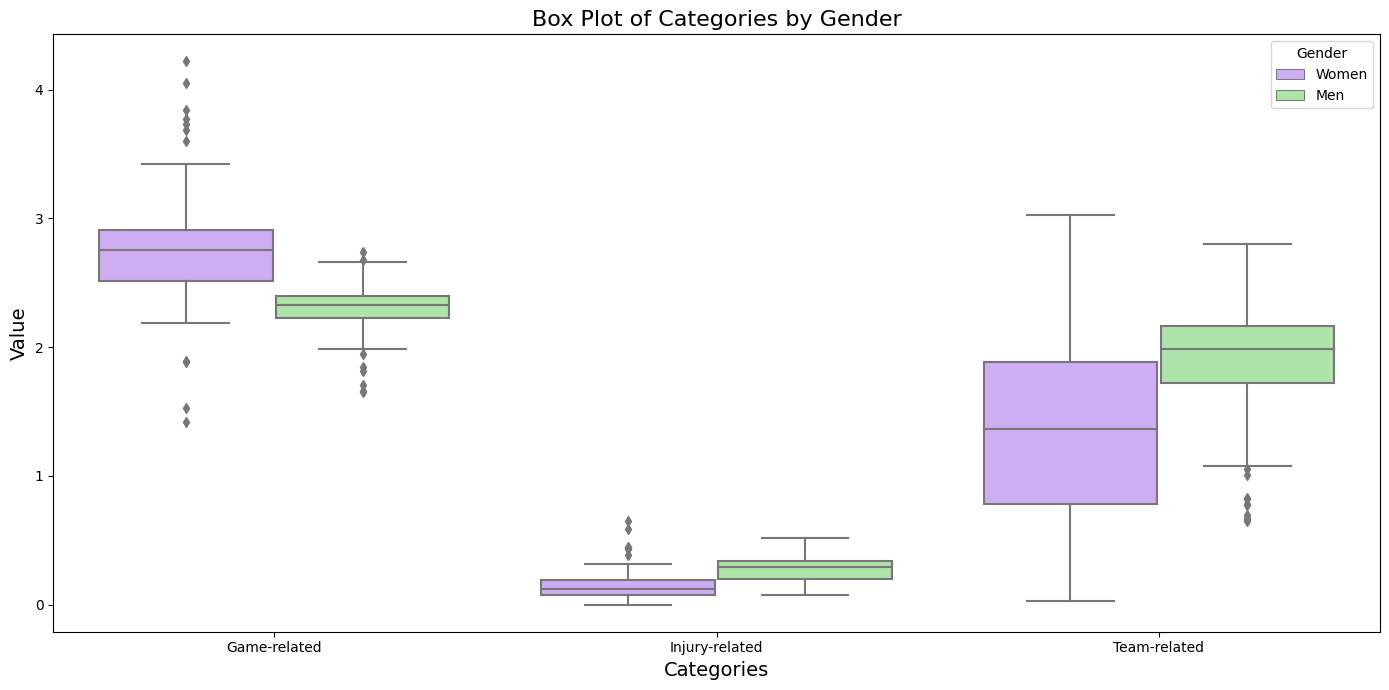

In [23]:
# Melt the DataFrames for Seaborn
prof_monthly_average_women['Gender'] = 'Women'
prof_monthly_average_men['Gender'] = 'Men'
prof_combined_data = pd.concat([prof_monthly_average_women, prof_monthly_average_men])

# Melt the DataFrame to long format for Seaborn
melted_data = prof_combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=melted_data, x='Category', y='Value', hue='Gender', palette={"Women": "#CDA1FF", "Men": "#A6ECA1"})

# Title and labels
plt.title('Box Plot of Categories by Gender', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

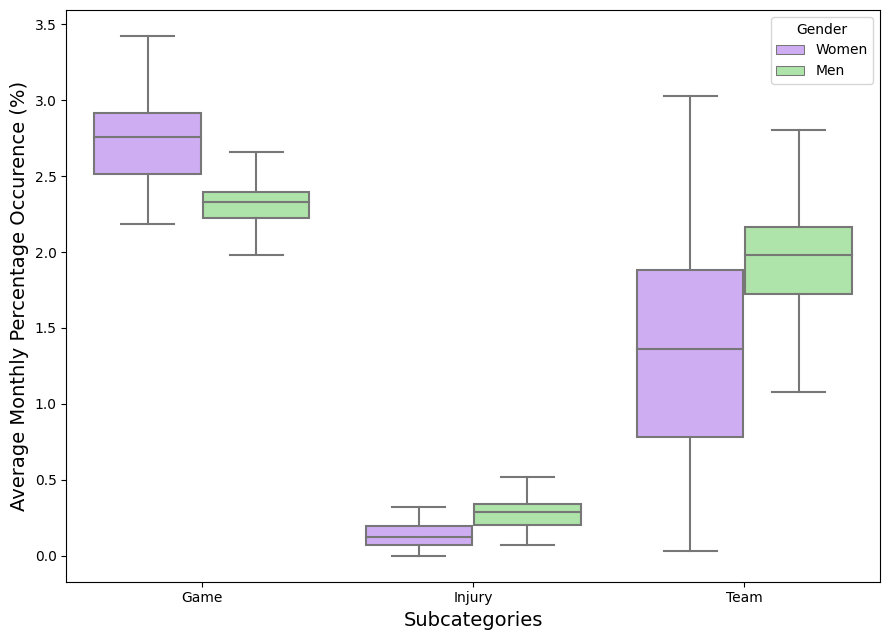

In [24]:
# Melt the DataFrames for Seaborn
prof_monthly_average_women['Gender'] = 'Women'
prof_monthly_average_men['Gender'] = 'Men'
prof_combined_data = pd.concat([prof_monthly_average_women, prof_monthly_average_men])

# Melt the DataFrame to long format for Seaborn
melted_data = prof_combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# Rename the categories in the 'Category' column
melted_data['Category'] = melted_data['Category'].replace({
    'Game-related': 'Game',
    'Injury-related': 'Injury',
    'Team-related': 'Team'
})

# Filter to include only the 3 desired categories
melted_data = melted_data[melted_data['Category'].isin(['Game', 'Injury', 'Team'])]

# Create the box plot without outliers
plt.figure(figsize=(9, 6.5))
sns.boxplot(
    data=melted_data,
    x='Category',
    y='Value',
    hue='Gender',
    palette={"Women": "#CDA1FF", "Men": "#A6ECA1"},
    showfliers=False  # Remove outliers
)

# Title and labels
# plt.title('Box Plot of Categories by Gender', fontsize=16)
plt.xlabel('Subcategories', fontsize=14)
plt.ylabel('Average Monthly Percentage Occurence (%)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [25]:
# merge liwc and human_coded_analysis
combined_data_women = pd.merge(monthly_average_women_liwc, prof_monthly_average_women, on='month_year')

In [26]:
combined_data_men = pd.merge(monthly_average_men_liwc, prof_monthly_average_men, on='month_year')

In [27]:
combined_data_men.head()

,family,friend,sexual,leisure,Game-related,Injury-related,Team-related,Gender
month_year,,,,,,,,
2015-01-01,0.083258,0.015674,0.027957,0.210374,2.267597,0.308064,2.098398,Men
2015-02-01,0.078426,0.019074,0.015278,0.225586,2.414228,0.341698,2.094136,Men
2015-03-01,0.066118,0.012524,0.029233,0.202412,2.379121,0.291917,1.778770,Men
2015-04-01,0.075714,0.012873,0.013286,0.206000,2.339270,0.293714,2.051810,Men
2015-05-01,0.086779,0.017890,0.021871,0.228847,2.271941,0.284726,1.943291,Men


In [28]:
# rename columns to ensure capitalization is consistent
combined_data_men = combined_data_men.rename(columns={'family': 'Family', 'friend': 'Friend', 'sexual': 'Sexual', 'leisure':'Leisure', 'Game-related': 'Game', 'Injury-related': 'Injury', 'Team-related': 'Team'})
combined_data_women = combined_data_women.rename(columns={'family': 'Family', 'friend': 'Friend', 'sexual': 'Sexual', 'leisure':'Leisure', 'Game-related': 'Game', 'Injury-related': 'Injury', 'Team-related': 'Team'})

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

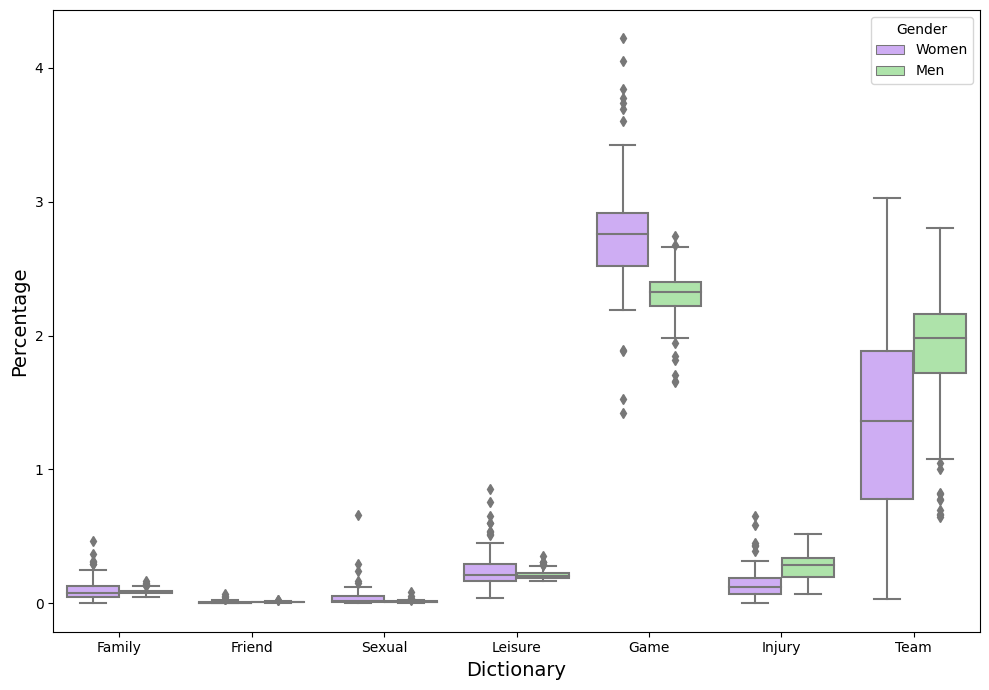

In [29]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# keep only relevant categories
melted_data = melted_data[melted_data['Category'].isin(['Family', 'Friend', 'Sexual', 'Leisure', 'Game', 'Injury', 'Team'])]

# Create the box plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=melted_data, x='Category', y='Value', hue='Gender', palette={"Women": "#CDA1FF", "Men": "#A6ECA1"})

# Title and labels
# plt.title('Box Plot of Categories by Gender', fontsize=16)
plt.xlabel('Dictionary', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

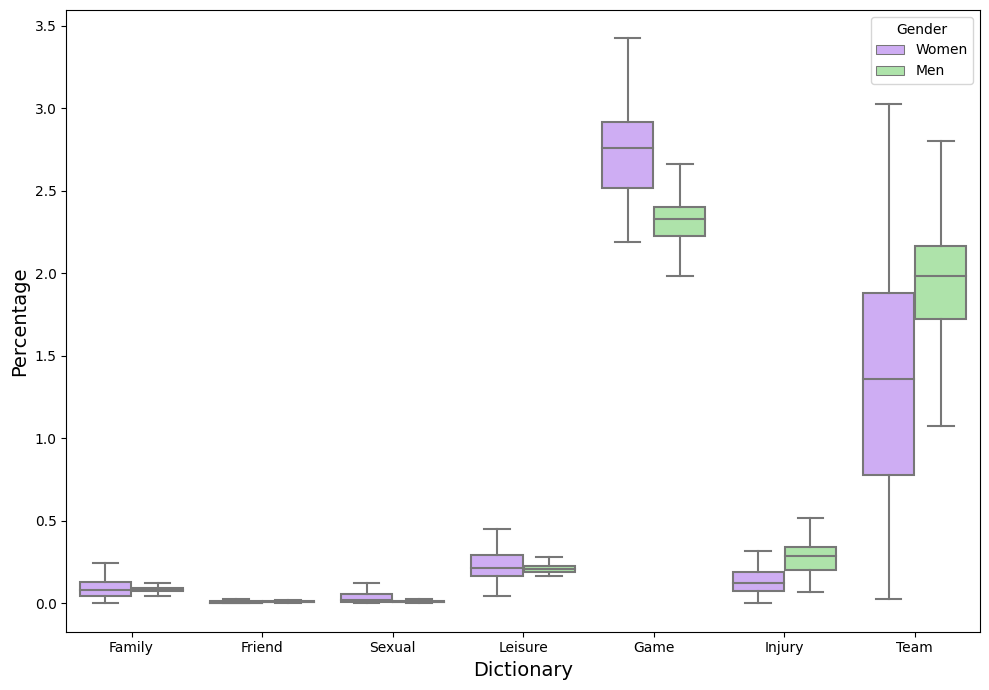

In [30]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# Keep only relevant categories
melted_data = melted_data[melted_data['Category'].isin(['Family', 'Friend', 'Sexual', 'Leisure', 'Game', 'Injury', 'Team'])]

melted_data['Category'] = melted_data['Category'].replace({
    'Game-related': 'Game',
    'Injury-related': 'Injury',
    'Team-related': 'Team'
})

# Create the box plot without outliers
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=melted_data,
    x='Category',
    y='Value',
    hue='Gender',
    palette={"Women": "#CDA1FF", "Men": "#A6ECA1"},
    showfliers=False  # Remove outliers
)

# Title and labels
plt.xlabel('Dictionary', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

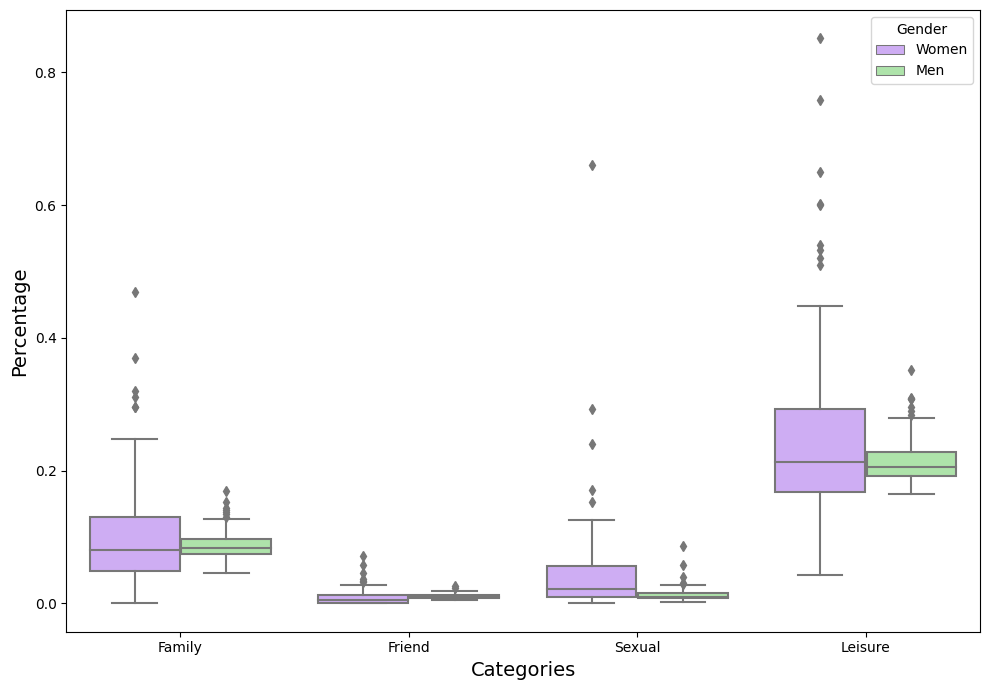

In [31]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# keep only categories family, friend, sexual
melted_data = melted_data[melted_data['Category'].isin(['Family', 'Friend', 'Sexual', 'Leisure'])]

# Create the box plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=melted_data, x='Category', y='Value', hue='Gender', palette={"Women": "#CDA1FF", "Men": "#A6ECA1"})

# Title and labels
# plt.title('Box Plot of Categories by Gender', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

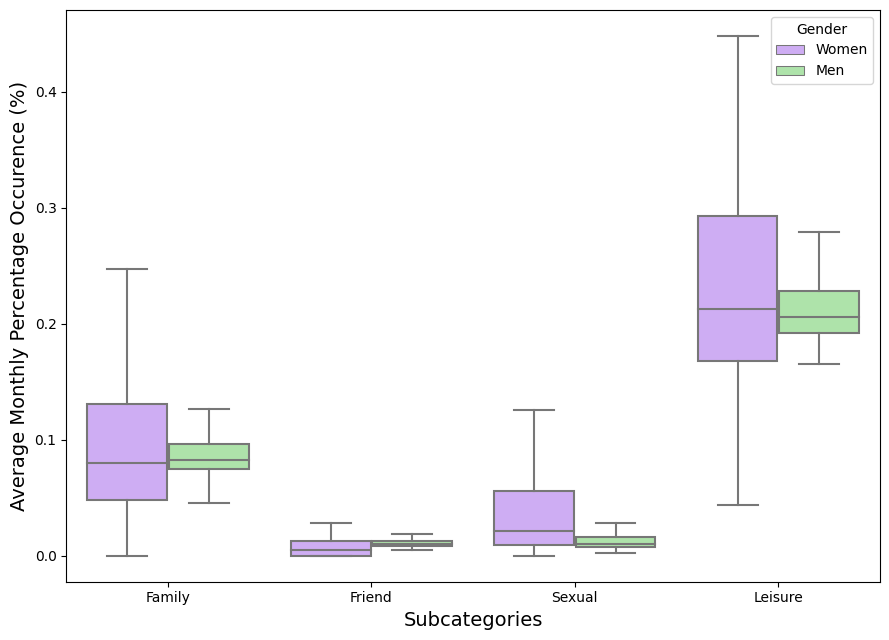

In [32]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# Keep only relevant categories: Family, Friend, Sexual
melted_data = melted_data[melted_data['Category'].isin(['Family', 'Friend', 'Sexual', 'Leisure'])]


# Create the box plot without outliers
plt.figure(figsize=(9, 6.5))
sns.boxplot(
    data=melted_data,
    x='Category',
    y='Value',
    hue='Gender',
    palette={"Women": "#CDA1FF", "Men": "#A6ECA1"},
    showfliers=False  # Remove outliers
)

# Title and labels
plt.xlabel('Subcategories', fontsize=14)
plt.ylabel('Average Monthly Percentage Occurence (%)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [33]:
# combine the averages from family, friend, leisure, sexual in a column called personal
combined_data_women = combined_data_women.assign(Personal = combined_data_women ['Family']  + combined_data_women ['Friend']  + combined_data_women ['Sexual'] + combined_data_women ['Leisure'])


In [34]:
combined_data_men = combined_data_men.assign(Personal = combined_data_men ['Family']  + combined_data_men ['Friend']  + combined_data_men ['Sexual'] + combined_data_women ['Leisure'])


In [35]:
combined_data_women = combined_data_women.assign(Professional = combined_data_women ['Game']  + combined_data_women ['Injury'] + combined_data_women ['Team'])

In [36]:
combined_data_men = combined_data_men.assign(Professional = combined_data_men ['Game']  + combined_data_men ['Injury'] + combined_data_men ['Team'])

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

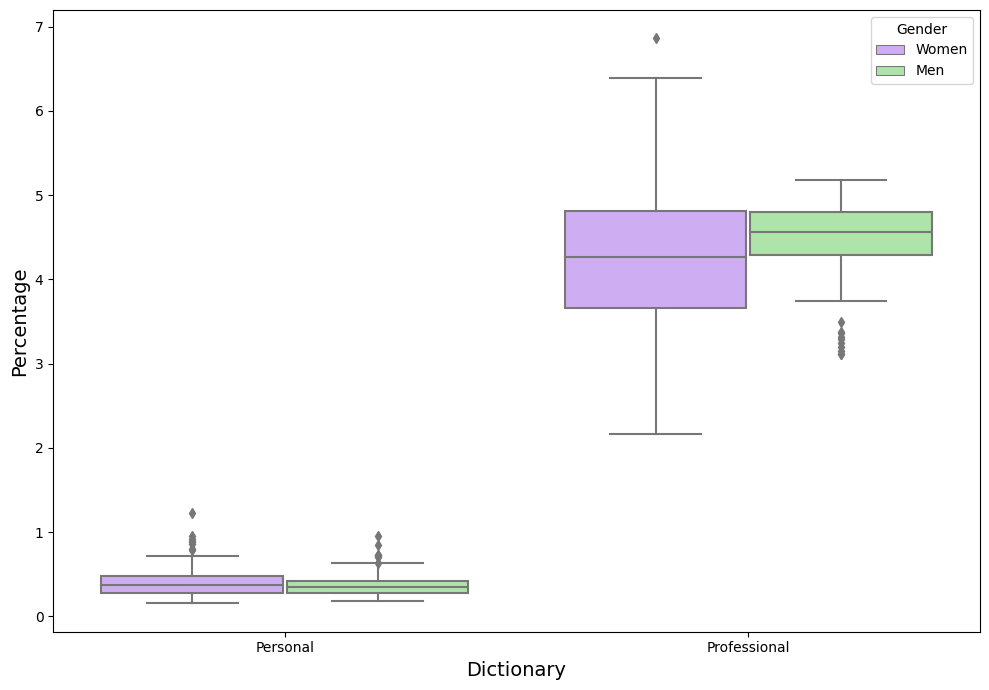

In [37]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# keep only personal and professional and gender columns
melted_data = melted_data[(melted_data['Category'] == 'Personal') | (melted_data['Category'] == 'Professional')]

# Create the box plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=melted_data, x='Category', y='Value', hue='Gender', palette={"Women": "#CDA1FF", "Men": "#A6ECA1"})

# Title and labels
# plt.title('Box Plot of Categories by Gender', fontsize=16)
plt.xlabel('Dictionary', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/seaborn/_oldcore.py:1498:

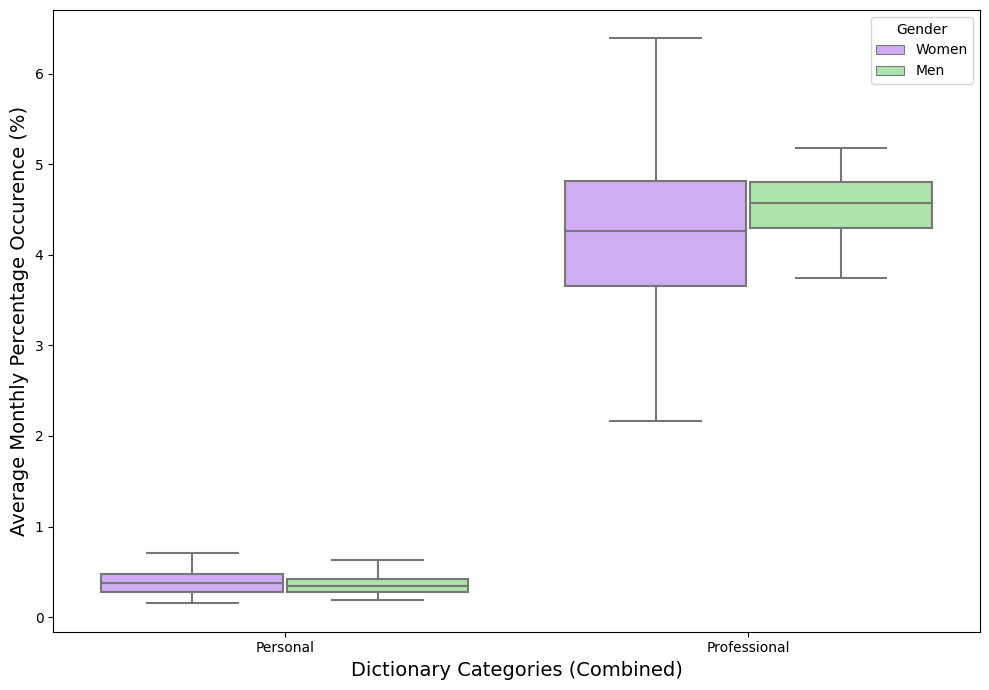

In [38]:
# Melt the DataFrames for Seaborn
combined_data_women['Gender'] = 'Women'
combined_data_men['Gender'] = 'Men'
combined_data = pd.concat([combined_data_women, combined_data_men])

# Melt the DataFrame to long format for Seaborn
melted_data = combined_data.reset_index().melt(id_vars=['month_year', 'Gender'], var_name='Category', value_name='Value')

# Keep only 'Personal' and 'Professional' categories
melted_data = melted_data[melted_data['Category'].isin(['Personal', 'Professional'])]

# Create the box plot without outliers
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=melted_data,
    x='Category',
    y='Value',
    hue='Gender',
    palette={"Women": "#CDA1FF", "Men": "#A6ECA1"},
    showfliers=False  # Remove outliers
)

# Labels
plt.xlabel('Dictionary Categories (Combined)', fontsize=14)
plt.ylabel('Average Monthly Percentage Occurence (%)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


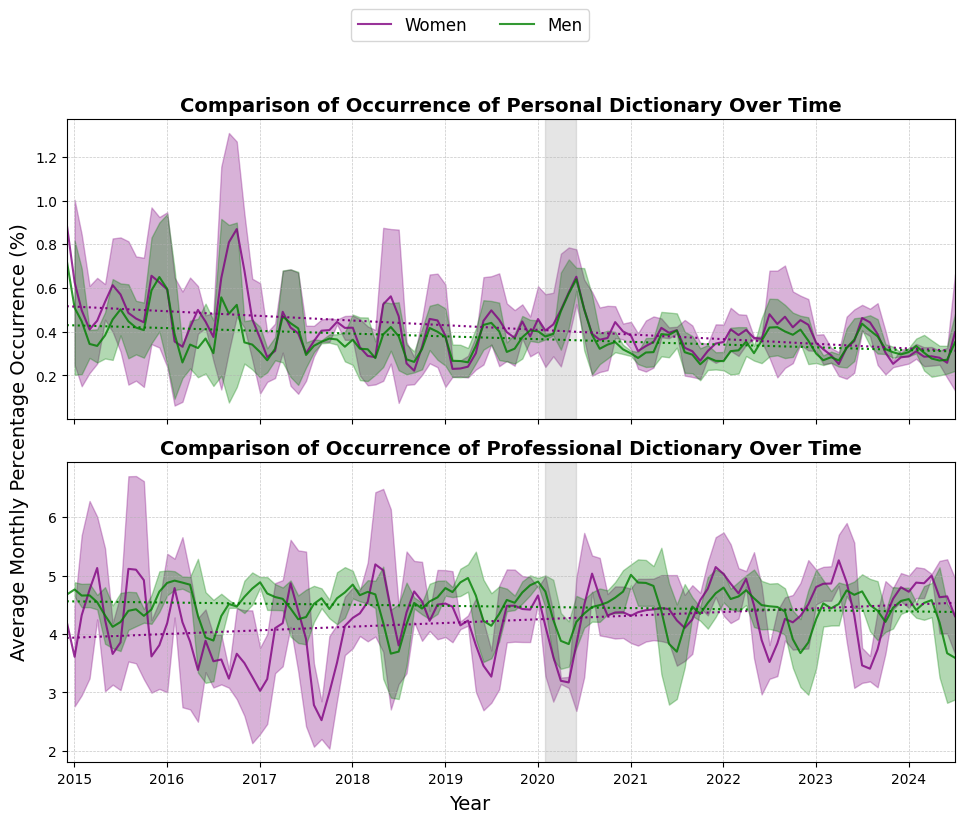

In [39]:
# Where shaded error is standard deviation

# Define colors for women and men
color_women = '#800080'  # Purple tone for women
color_men = '#008000'    # Green tone for men

# Keep only 'Personal' and 'Professional' categories
melted_data = melted_data[melted_data['Category'].isin(['Personal', 'Professional'])]

# Set up a grid of subplots, one for each category (Personal, Professional)
fig, axes = plt.subplots(nrows=len(melted_data['Category'].unique()), ncols=1, figsize=(10, len(melted_data['Category'].unique()) * 4), sharex=True)

if len(melted_data['Category'].unique()) == 1:
    axes = [axes]

# Rolling window size for smoothing (e.g., 3 months)
rolling_window = 3

# Define the start and end of the shaded period (March to June 2020)
highlight_start = pd.to_datetime("2020-03-01")
highlight_end = pd.to_datetime("2020-06-30")

# Iterate through each category (Personal and Professional)
for i, category in enumerate(melted_data['Category'].unique()):
    ax = axes[i]
    
    # Filter data for the current category
    category_data = melted_data[melted_data['Category'] == category]
    
    # Split the data by gender (Women and Men)
    women_data = category_data[category_data['Gender'] == 'Women'].copy()
    men_data = category_data[category_data['Gender'] == 'Men'].copy()
    
    # Convert month_year to datetime
    x_women = pd.to_datetime(women_data['month_year'])
    x_men = pd.to_datetime(men_data['month_year'])
    
    # Apply rolling mean for smoothing
    women_data['Smoothed'] = women_data['Value'].rolling(window=rolling_window, min_periods=1).mean()
    men_data['Smoothed'] = men_data['Value'].rolling(window=rolling_window, min_periods=1).mean()
    
    # Calculate rolling standard deviation for error shading
    women_data['Error'] = women_data['Value'].rolling(window=rolling_window, min_periods=1).std()
    men_data['Error'] = men_data['Value'].rolling(window=rolling_window, min_periods=1).std()
    
        # Plot smoothed data for women and men
    line_women, = ax.plot(x_women, women_data['Smoothed'], color=color_women, label='Women', alpha=0.8)
    line_men, = ax.plot(x_men, men_data['Smoothed'], color=color_men, label='Men', alpha=0.8)
    
    # Add shaded area for error (standard deviation)
    ax.fill_between(x_women, women_data['Smoothed'] - women_data['Error'], women_data['Smoothed'] + women_data['Error'], color=color_women, alpha=0.3)
    ax.fill_between(x_men, men_data['Smoothed'] - men_data['Error'], men_data['Smoothed'] + men_data['Error'], color=color_men, alpha=0.3)
    
    # Line of Best Fit for Women (Linear Fit)
    best_fit_women = np.poly1d(np.polyfit(x_women.map(lambda d: d.toordinal()), women_data['Smoothed'], 1))
    ax.plot(x_women, best_fit_women(x_women.map(lambda d: d.toordinal())), color=color_women, linestyle=':', linewidth=1.5)
    
    # Line of Best Fit for Men (Linear Fit)
    best_fit_men = np.poly1d(np.polyfit(x_men.map(lambda d: d.toordinal()), men_data['Smoothed'], 1))
    ax.plot(x_men, best_fit_men(x_men.map(lambda d: d.toordinal())), color=color_men, linestyle=':', linewidth=1.5)
    
    # Gray out the period from March to June 2020
    ax.axvspan(highlight_start, highlight_end, color='grey', alpha=0.2)
    
    # Set tight x-axis limits
    x_min = min(x_women.min(), x_men.min())  # Find the minimum x date
    x_max = max(x_women.max(), x_men.max())  # Find the maximum x date
    ax.set_xlim(x_min, x_max)  # Set limits to remove extra space

    # Titles and labels
    ax.set_title(f'Comparison of Occurrence of {category.capitalize()} Dictionary Over Time', fontsize=14, fontweight='bold')

    # Add grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)



# Set common x-axis label
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)
# Set common y-axis label
fig.text(0.04, 0.5, 'Average Monthly Percentage Occurrence (%)', va='center', rotation='vertical', fontsize=14)

# Formatting x-ticks for all subplots
x_ticks = pd.date_range(start=min(melted_data['month_year']), end=max(melted_data['month_year']), freq='12M')
x_labels = x_ticks.strftime('%Y')

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_labels, rotation=0, ha='center')

# Create a single legend outside the plots
fig.legend([line_women, line_men], ['Women', 'Men'], loc='upper center', fontsize=12, ncol=2, bbox_to_anchor=(0.5, 1.05))

# Adjust layout and show the plot
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


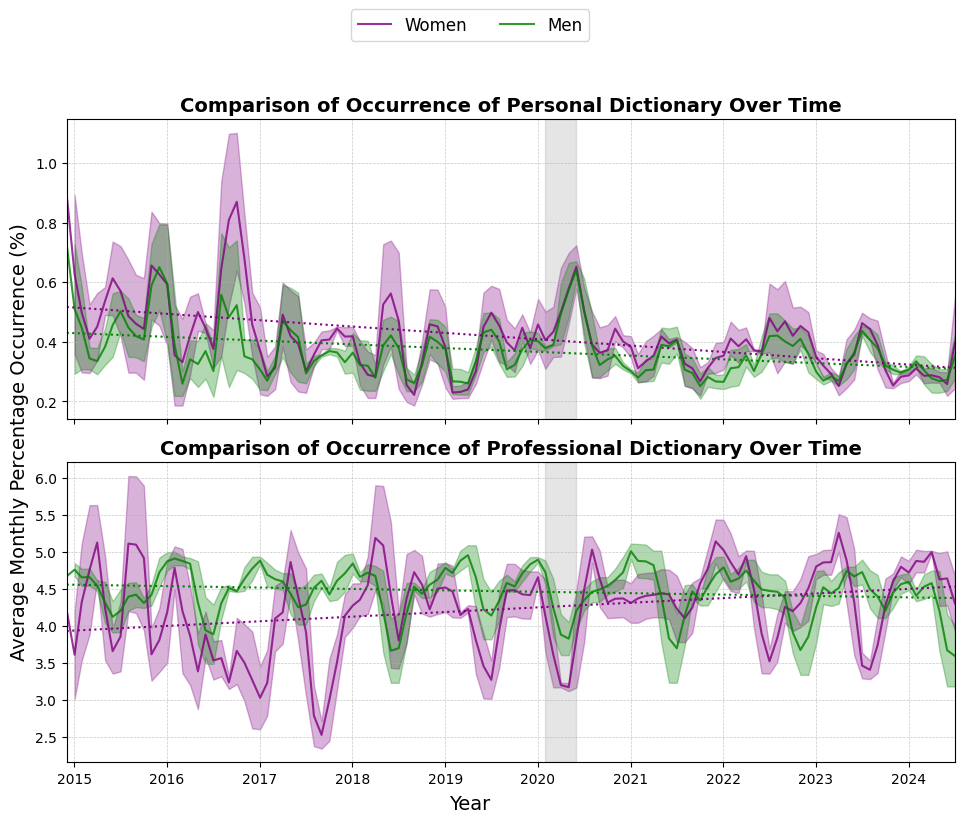

In [40]:
# Where shaded error is stardard error

# Define colors for women and men
color_women = '#800080'  # Purple tone for women
color_men = '#008000'    # Green tone for men

# Keep only 'Personal' and 'Professional' categories
melted_data = melted_data[melted_data['Category'].isin(['Personal', 'Professional'])]

# Set up a grid of subplots, one for each category (Personal, Professional)
fig, axes = plt.subplots(nrows=len(melted_data['Category'].unique()), ncols=1, figsize=(10, len(melted_data['Category'].unique()) * 4), sharex=True)

if len(melted_data['Category'].unique()) == 1:
    axes = [axes]

# Rolling window size for smoothing (e.g., 3 months)
rolling_window = 3

# Define the start and end of the shaded period (March to June 2020)
highlight_start = pd.to_datetime("2020-03-01")
highlight_end = pd.to_datetime("2020-06-30")

# Iterate through each category (Personal and Professional)
for i, category in enumerate(melted_data['Category'].unique()):
    ax = axes[i]
    
    # Filter data for the current category
    category_data = melted_data[melted_data['Category'] == category]
    
    # Split the data by gender (Women and Men)
    women_data = category_data[category_data['Gender'] == 'Women'].copy()
    men_data = category_data[category_data['Gender'] == 'Men'].copy()
    
    # Convert month_year to datetime
    x_women = pd.to_datetime(women_data['month_year'])
    x_men = pd.to_datetime(men_data['month_year'])
    
    # Apply rolling mean for smoothing
    women_data['Smoothed'] = women_data['Value'].rolling(window=rolling_window, min_periods=1).mean()
    men_data['Smoothed'] = men_data['Value'].rolling(window=rolling_window, min_periods=1).mean()
    
    # Calculate rolling standard error for women and men
    women_data['Error'] = women_data['Value'].rolling(window=rolling_window, min_periods=1)\
        .apply(lambda x: sem(x, nan_policy='omit'), raw=True)

    men_data['Error'] = men_data['Value'].rolling(window=rolling_window, min_periods=1)\
        .apply(lambda x: sem(x, nan_policy='omit'), raw=True)
    
        # Plot smoothed data for women and men
    line_women, = ax.plot(x_women, women_data['Smoothed'], color=color_women, label='Women', alpha=0.8)
    line_men, = ax.plot(x_men, men_data['Smoothed'], color=color_men, label='Men', alpha=0.8)
    
    # Add shaded area for error (standard deviation)
    ax.fill_between(x_women, women_data['Smoothed'] - women_data['Error'], women_data['Smoothed'] + women_data['Error'], color=color_women, alpha=0.3)
    ax.fill_between(x_men, men_data['Smoothed'] - men_data['Error'], men_data['Smoothed'] + men_data['Error'], color=color_men, alpha=0.3)
    
    # Line of Best Fit for Women (Linear Fit)
    best_fit_women = np.poly1d(np.polyfit(x_women.map(lambda d: d.toordinal()), women_data['Smoothed'], 1))
    ax.plot(x_women, best_fit_women(x_women.map(lambda d: d.toordinal())), color=color_women, linestyle=':', linewidth=1.5)
    
    # Line of Best Fit for Men (Linear Fit)
    best_fit_men = np.poly1d(np.polyfit(x_men.map(lambda d: d.toordinal()), men_data['Smoothed'], 1))
    ax.plot(x_men, best_fit_men(x_men.map(lambda d: d.toordinal())), color=color_men, linestyle=':', linewidth=1.5)
    
    # Gray out the period from March to June 2020
    ax.axvspan(highlight_start, highlight_end, color='grey', alpha=0.2)
    
    # Set tight x-axis limits
    x_min = min(x_women.min(), x_men.min())  # Find the minimum x date
    x_max = max(x_women.max(), x_men.max())  # Find the maximum x date
    ax.set_xlim(x_min, x_max)  # Set limits to remove extra space

    # Titles and labels
    ax.set_title(f'Comparison of Occurrence of {category.capitalize()} Dictionary Over Time', fontsize=14, fontweight='bold')

    # Add grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)



# Set common x-axis label
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=14)
# Set common y-axis label
fig.text(0.04, 0.5, 'Average Monthly Percentage Occurrence (%)', va='center', rotation='vertical', fontsize=14)

# Formatting x-ticks for all subplots
x_ticks = pd.date_range(start=min(melted_data['month_year']), end=max(melted_data['month_year']), freq='12M')
x_labels = x_ticks.strftime('%Y')

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_labels, rotation=0, ha='center')

# Create a single legend outside the plots
fig.legend([line_women, line_men], ['Women', 'Men'], loc='upper center', fontsize=12, ncol=2, bbox_to_anchor=(0.5, 1.05))

# Adjust layout and show the plot
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()


### I then want to check for statistically significance between the different dictionary categories
To do this I first have to check for some assumption 

In [377]:
combined_data.head()

,Family,Friend,Sexual,Leisure,Game-related,Injury-related,Team-related,Gender,Personal,Professional
month_year,,,,,,,,,,
2015-01-01,0.000000,0.000000,0.293333,0.600000,3.073333,0.075000,1.061667,Women,0.893333,4.210000
2015-02-01,0.180000,0.000000,0.000000,0.180000,2.830000,0.000000,0.180000,Women,0.360000,3.010000
2015-03-01,0.025000,0.000000,0.000000,0.216250,4.218750,0.082500,1.441250,Women,0.241250,5.742500
2015-04-01,0.062857,0.012857,0.240000,0.314286,2.894286,0.011429,2.618571,Women,0.630000,5.524286
2015-05-01,0.163529,0.006471,0.171176,0.138824,2.971765,0.141765,1.008235,Women,0.480000,4.121765


In [378]:
# Reset the index to flatten the structure
combined_data.reset_index(inplace=True)

# Verify and adjust column names
combined_data.columns = ['month_year', 'Family', 'Friend', 'Sexual', 'Leisure', 'Game-related', 
              'Injury-related', 'Team-related', 'Gender', 'Personal', 'Professional']


In [379]:
combined_data.head()

,month_year,Family,Friend,Sexual,Leisure,Game-related,Injury-related,Team-related,Gender,Personal,Professional
0,2015-01-01,0.000000,0.000000,0.293333,0.600000,3.073333,0.075000,1.061667,Women,0.893333,4.210000
1,2015-02-01,0.180000,0.000000,0.000000,0.180000,2.830000,0.000000,0.180000,Women,0.360000,3.010000
2,2015-03-01,0.025000,0.000000,0.000000,0.216250,4.218750,0.082500,1.441250,Women,0.241250,5.742500
3,2015-04-01,0.062857,0.012857,0.240000,0.314286,2.894286,0.011429,2.618571,Women,0.630000,5.524286
4,2015-05-01,0.163529,0.006471,0.171176,0.138824,2.971765,0.141765,1.008235,Women,0.480000,4.121765


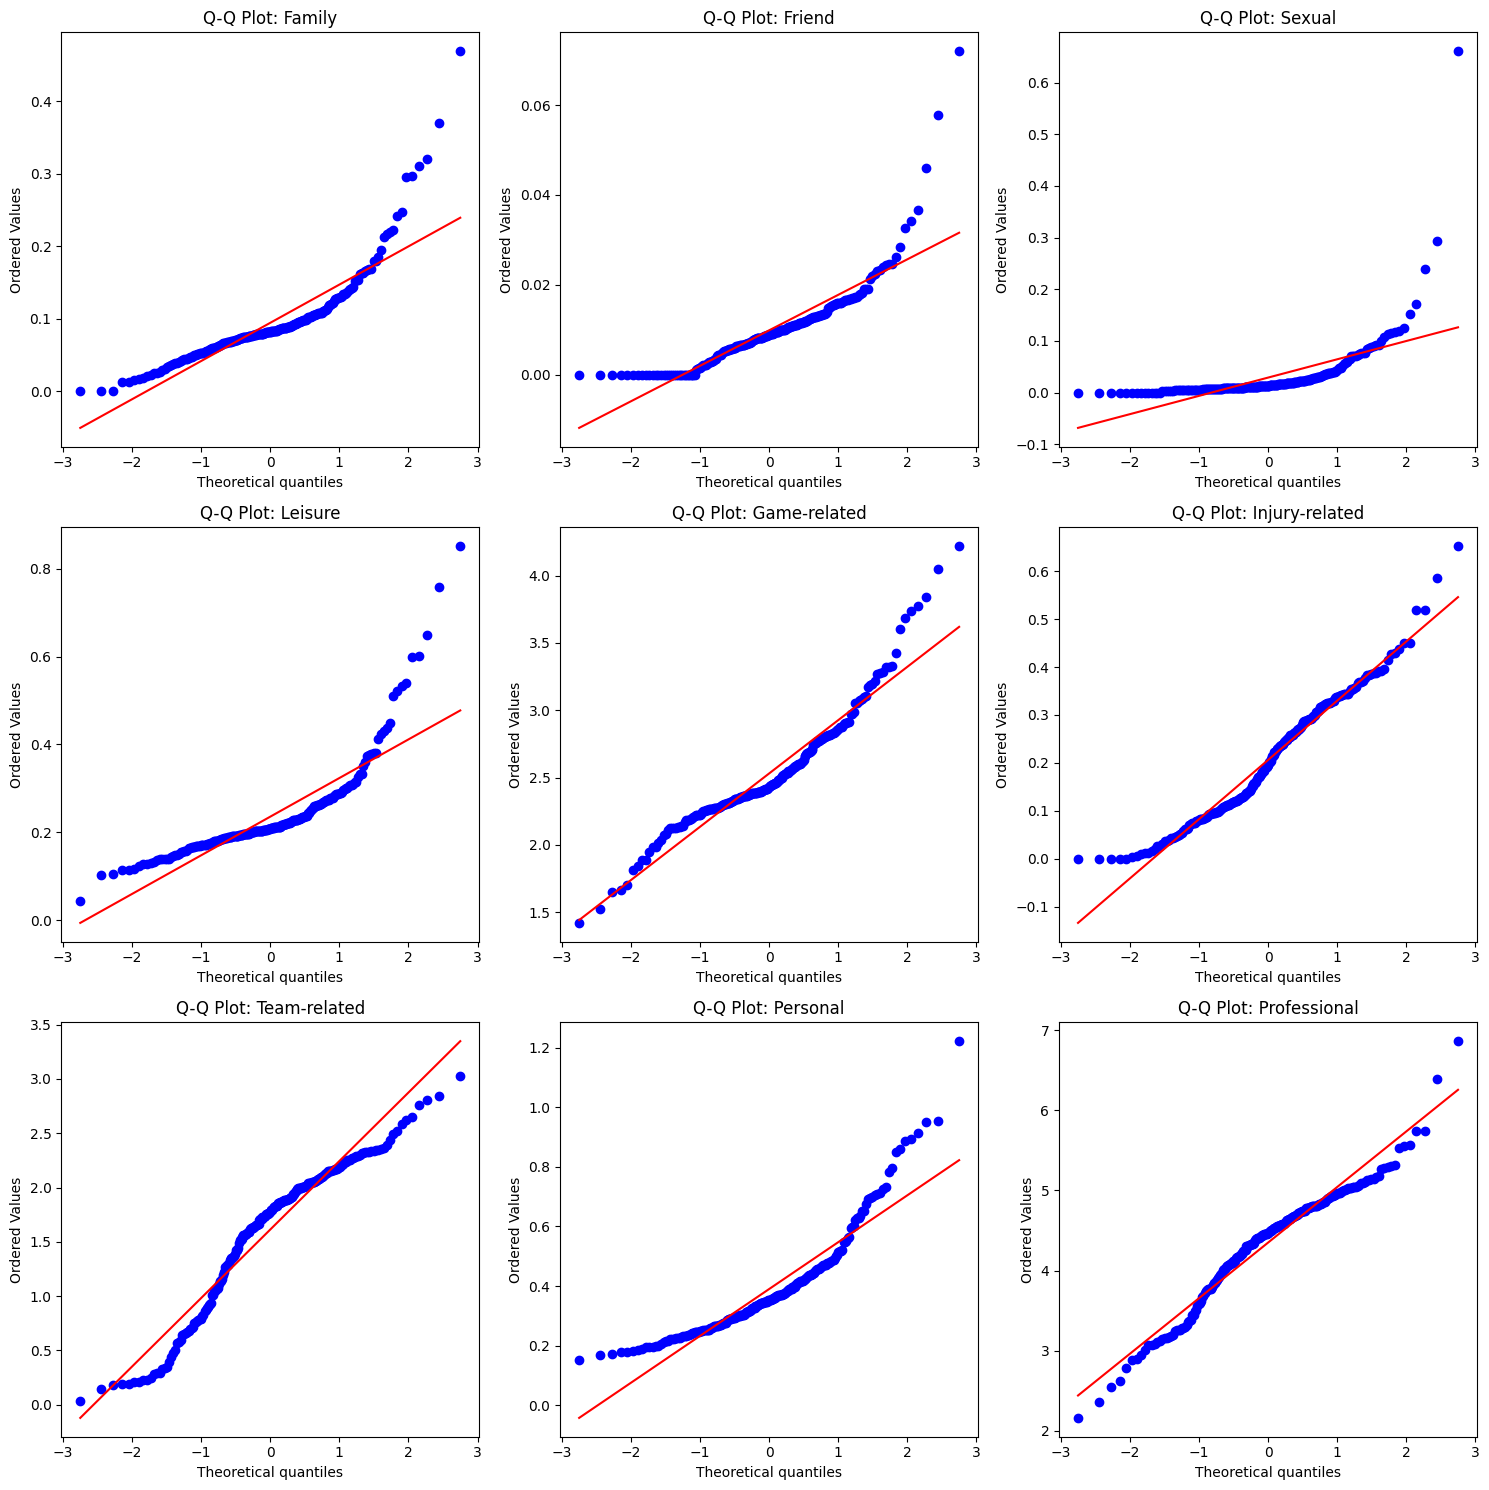

In [380]:
# Combine data from both genders for normality check
normality_test = combined_data.drop(columns=['month_year', 'Gender'])  # Drop non-numeric columns

# Set up grid dimensions for subplots
num_columns = normality_test.shape[1]
grid_rows = math.ceil(num_columns / 3)  # Adjust number of columns in the grid (e.g., 3 per row)

# Create subplots
fig, axes = plt.subplots(grid_rows, 3, figsize=(15, 5 * grid_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate over axes

# Generate Q-Q plots for all numeric columns
for i, column in enumerate(normality_test.columns):
    stats.probplot(normality_test[column], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes

# Adjust layout
plt.tight_layout()
plt.show()

In [381]:
stat, p = shapiro(combined_data['Family'])
print(f"Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data appears normally distributed.")
else:
    print("Data does not appear normally distributed.")


Shapiro-Wilk Test: stat=0.786, p=0.000
Data does not appear normally distributed.


In [382]:
stat, p = shapiro(combined_data['Game-related'])
print(f"Shapiro-Wilk Test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data appears normally distributed.")
else:
    print("Data does not appear normally distributed.")

Shapiro-Wilk Test: stat=0.930, p=0.000
Data does not appear normally distributed.


In [383]:
stat, p = levene(women_data['Family'], men_data['Family'])
print(f"Levene’s Test: stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Variances are equal.")
else:
    print("Variances are not equal.")

KeyError: 'Family'

In [384]:
combined_data.head()

,month_year,Family,Friend,Sexual,Leisure,Game-related,Injury-related,Team-related,Gender,Personal,Professional
0,2015-01-01,0.000000,0.000000,0.293333,0.600000,3.073333,0.075000,1.061667,Women,0.893333,4.210000
1,2015-02-01,0.180000,0.000000,0.000000,0.180000,2.830000,0.000000,0.180000,Women,0.360000,3.010000
2,2015-03-01,0.025000,0.000000,0.000000,0.216250,4.218750,0.082500,1.441250,Women,0.241250,5.742500
3,2015-04-01,0.062857,0.012857,0.240000,0.314286,2.894286,0.011429,2.618571,Women,0.630000,5.524286
4,2015-05-01,0.163529,0.006471,0.171176,0.138824,2.971765,0.141765,1.008235,Women,0.480000,4.121765


In [385]:
# Assuming 'combined_data' is your DataFrame containing both men and women data

# Filter by Gender to separate women and men data
women_data = combined_data[combined_data['Gender'] == 'Women']
men_data = combined_data[combined_data['Gender'] == 'Men']

# Example: Mann-Whitney U test for each column
categories = ['Family', 'Friend', 'Sexual', 'Leisure', 'Game-related', 'Injury-related', 'Team-related', 'Personal', 'Professional']
results = {}

for category in categories:
    # Perform the Mann-Whitney U test between women and men for each category
    stat, p_value = mannwhitneyu(women_data[category], men_data[category])
    
    # Store the results
    results[category] = p_value

# Display the results
for category, p_value in results.items():
    print(f"Mann-Whitney U Test p-value for {category}: {p_value}")
    if p_value < 0.05:
        print(f"  - Significant difference found for {category}.")
    else:
        print(f"  - No significant difference for {category}.")


Mann-Whitney U Test p-value for Family: 0.5671566589313053
  - No significant difference for Family.
Mann-Whitney U Test p-value for Friend: 6.677874562241554e-07
  - Significant difference found for Friend.
Mann-Whitney U Test p-value for Sexual: 2.8797918269408267e-06
  - Significant difference found for Sexual.
Mann-Whitney U Test p-value for Leisure: 0.2984236688729195
  - No significant difference for Leisure.
Mann-Whitney U Test p-value for Game-related: 4.853077572639458e-23
  - Significant difference found for Game-related.
Mann-Whitney U Test p-value for Injury-related: 1.2571027774433712e-15
  - Significant difference found for Injury-related.
Mann-Whitney U Test p-value for Team-related: 2.656929495653407e-11
  - Significant difference found for Team-related.
Mann-Whitney U Test p-value for Personal: 0.10801673700960067
  - No significant difference for Personal.
Mann-Whitney U Test p-value for Professional: 0.01589810162330327
  - Significant difference found for Profession

In [386]:
# Filter by Gender to separate women and men data
women_data = combined_data[combined_data['Gender'] == 'Women']
men_data = combined_data[combined_data['Gender'] == 'Men']

# Example: Mann-Whitney U test for each column
categories = ['Family', 'Friend', 'Sexual', 'Leisure', 'Game-related', 'Injury-related', 'Team-related', 'Personal', 'Professional']
# results = {}

# Dictionary to store results
results = []

# Perform the Mann-Whitney U test between women and men for each category
for category in categories:
    # Perform the test
    stat, p_value = mannwhitneyu(women_data[category], men_data[category])
    
    # Calculate the effect size (Rank-Biserial Correlation)
    n1 = len(women_data[category])
    n2 = len(men_data[category])
    effect_size = 1 - (2 * stat) / (n1 * n2)
    
    # Append results as a dictionary
    results.append({
        "Category": category,
        "Statistic": stat,
        "p-value": p_value,
        "Effect Size (R)": effect_size,
        "Significant?": "Yes" if p_value < 0.05 else "No"
    })

# Convert to pandas DataFrame
results_df = pd.DataFrame(results)

results_df.head()


,Category,Statistic,p-value,Effect Size (R),Significant?
0,Family,6435.0,5.671567e-01,0.043549,No
1,Friend,4190.5,6.677875e-07,0.377155,Yes
2,Sexual,9120.0,2.879792e-06,-0.355529,Yes
3,Leisure,7260.0,2.984237e-01,-0.079073,No
4,Game-related,11781.0,4.853078e-23,-0.751040,Yes


In [387]:
results_df.head(10)

,Category,Statistic,p-value,Effect Size (R),Significant?
0,Family,6435.0,5.671567e-01,0.043549,No
1,Friend,4190.5,6.677875e-07,0.377155,Yes
2,Sexual,9120.0,2.879792e-06,-0.355529,Yes
3,Leisure,7260.0,2.984237e-01,-0.079073,No
4,Game-related,11781.0,4.853078e-23,-0.751040,Yes
5,Injury-related,2639.0,1.257103e-15,0.607759,Yes
6,Team-related,3321.0,2.656929e-11,0.506391,Yes
7,Personal,7550.0,1.080167e-01,-0.122176,No
8,Professional,5495.0,1.589810e-02,0.183264,Yes
